In [25]:
import gym
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from agents.agent import DDPG

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [26]:
# envStr = 'Pendulum-v0'
envStr = "MountainCarContinuous-v0"
env = gym.make(envStr)
agent = DDPG(env, gym=True)
path = os.getcwd()+'/' + envStr

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [27]:
num_episode = 100
scores = []

In [ ]:
num_episode = 100
for i in range(1, num_episode+1):
    state = agent.reset_episode()
    iteration = 0
    while True:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        iteration += 1
        
        if done:
            scores.append(agent.score)
            print('\rEpisode: {}, iteration: {}, score: {:4f}, best_score: {:4f}'.format(i, iteration, agent.score, agent.best_score), end='')
            sys.stdout.flush()
            break
            
agent.save_weight(path)

Episode: 31, iteration: 999, score: -30.529334, best_score: 90.957064

In [22]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

def plot_scores(results, N):
    smoothed_scores = running_mean(results, N)
    eps = list(range(1, len(results)+1))
    plt.plot(eps[-len(smoothed_scores):], smoothed_scores)
    plt.plot(eps, results, color='grey', alpha=0.3)
    plt.xlabel('Episode')
    plt.ylabel('Score')

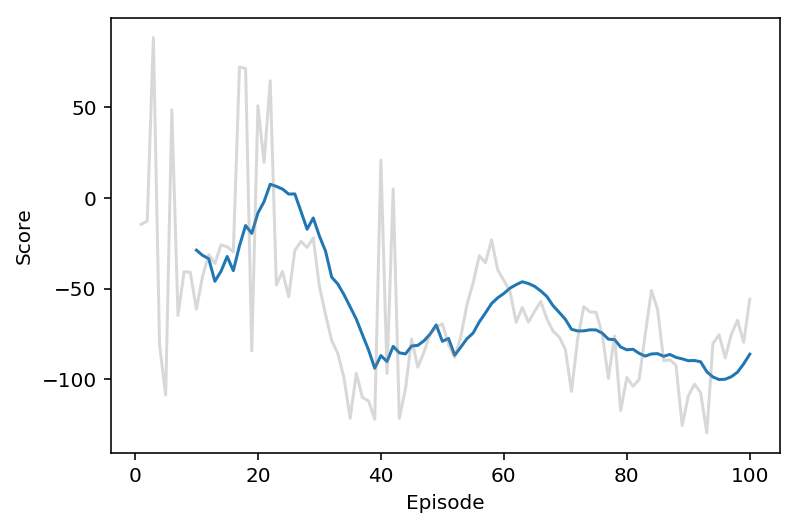

In [23]:
plot_scores(scores, 10)

In [7]:
path

'/Users/Young/Desktop/Deep-learning/RL/RL-Quadcopter-2/MountainCarContinuous-v0'

In [16]:
!python DDPGWithSimpleTask.py '/Users/Young/Desktop/Deep-learning/RL/RL-Quadcopter-2/MountainCarContinuous-v0'

Using TensorFlow backend.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
2018-07-19 09:21:39.643234: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2018-07-19 09:21:39.643269: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2018-07-19 09:21:39.643275: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2018-07-19 09:21:39.643280: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn